In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
with open('strategies.pkl', 'rb') as strat_pkl:
    strategies = pickle.load(strat_pkl)
strategies[0]

{'setup': {'model path': 'testroom5_1.obj',
  'candidate grid path': 'locationgrid5_2.obj',
  'minimum distance': 1.5,
  'maximum distance': 20,
  'minimum incidence angle': 15,
  'minimum output angle': 30,
  'maximum output angle': 180,
  'minimum local point density': 45,
  'scanner point spacing at 10m': 10,
  'z axis': [0.0, 0.0, -1.0],
  'debug skip candidate': 1,
  'time log option': False,
  'greedy type': 'count goal',
  'greedy weighted': True,
  'weight of the weight': None,
  'count goal': 5,
  'coverage goal': None,
  'print chosen scanpoints': True,
  'heatmap export': True,
  'show heatmaps': True,
  'save heatmaps': True,
  'heatmaps per iteration': False,
  'export obj file per scan': False,
  'export raw scans': False,
  'greedy area': True,
  'heatmap face': True,
  'heatmap 3d': False,
  'save strategy map': True,
  'configpath': '/home/fnoic/PycharmProjects/scanplan/config_pool/',
  'id': 0,
  'path': '/home/fnoic/PycharmProjects/scanplan/config_pool//config_0/'},


In [3]:
# for every strategy: greedy weighted, greedy counted, cov goal, gov reached, num loc
strats = []
for strat in strategies:
    strats.append(
        {
            'id': strat['setup']['id'],
            'greedy type': strat['setup']['greedy type'],
            'greedy weighted': strat['setup']['greedy weighted'],
            'coverage targeted': strat['setup']['coverage goal'],
            'coverage achieved': strat['strategy']['coverage achieved relative'],
            'location goal': strat['setup']['count goal'],
            'location count': strat['strategy']['scanpoint count']
        }
    )
    
strats = pd.DataFrame(strats).sort_values(by=['id'])
strats

,id,greedy type,greedy weighted,coverage targeted,coverage achieved,location goal,location count
0,0,count goal,True,None,0.001842,5,5
1,1,count goal,False,None,0.003284,5,5


In [1]:
strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]

NameError: name 'strats' is not defined

In [5]:
strats[(strats["coverage targeted"] == 1)]

,id,greedy type,greedy weighted,coverage targeted,coverage achieved,location goal,location count


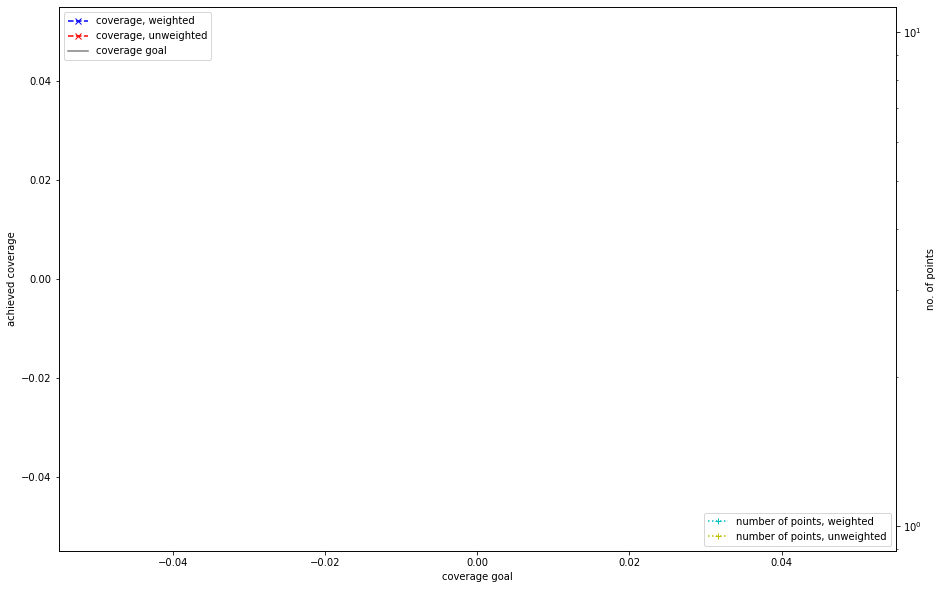

In [6]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 10)

ax1.set_xlabel('coverage goal')
ax1.set_ylabel('achieved coverage')
ax1.plot(strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == True)]["coverage targeted"],
         strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == True)]["coverage achieved"],
         linestyle='--', marker='x', color='b', label='coverage, weighted')
ax1.plot(strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]["coverage targeted"],
         strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]["coverage achieved"],
         linestyle='--', marker='x', color='r', label='coverage, unweighted')
ax1.plot(strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]["coverage targeted"],
         strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]["coverage targeted"],
         linestyle='-', marker='', color='grey', label='coverage goal')
leg = plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('no. of points')
ax2.set_yscale('log')
ax2.plot(strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == True)]["coverage targeted"],
         strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == True)]["location count"],
         linestyle=':', marker='+', color='c', label='number of points, weighted')
ax2.plot(strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]["coverage targeted"],
         strats[(strats["greedy type"] == 'coverage goal') & (strats["greedy weighted"] == False)]["location count"],
         linestyle=':', marker='+', color='y', label='number of points, unweighted')
leg = plt.legend(loc='lower right')

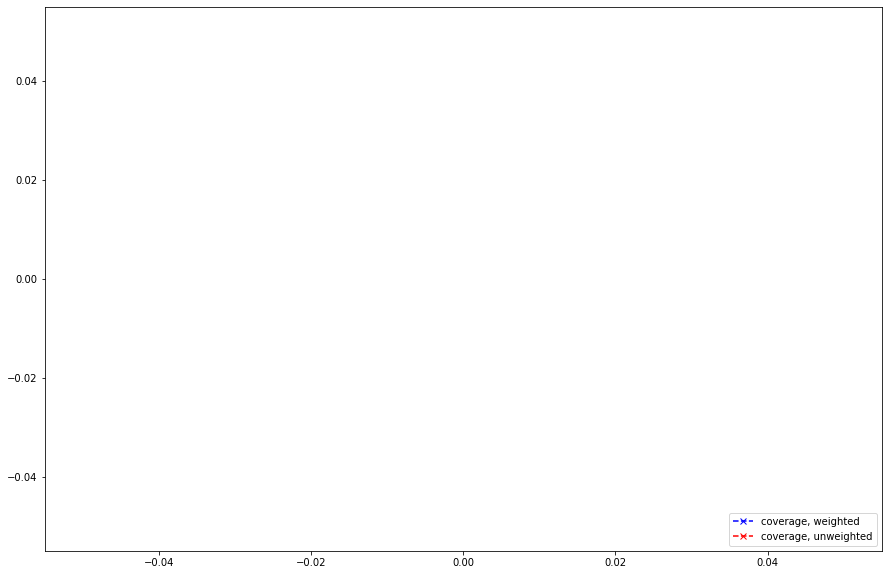

In [7]:
#coverage per point set
#fig3, ax3 = plt.plot()
n = 50
x = strats[(strats["greedy type"] == 'count goal') & (strats["greedy weighted"] == True)]["location goal"][n:]
y1 = strats[(strats["greedy type"] == 'count goal') & (strats["greedy weighted"] == True)]["coverage achieved"][n:]
y2 = strats[(strats["greedy type"] == 'count goal') & (strats["greedy weighted"] == False)]["coverage achieved"][n:]
plt.figure(figsize=(15, 10))
plt.plot(x, y1, linestyle='--', marker='x', color='b', label="coverage, weighted")
plt.plot(x, y2, linestyle='--', marker='x', color='r', label="coverage, unweighted")
plt.legend(loc="lower right")
plt.show()

diff = [(strat["greedy weighted"] - strat["greedy unweighted"]) for strat in strats[strats["greedy type"] == 'count goal']]

In [8]:
[strat for strat in strats[strats["greedy type"] == 'count goal']]

['id',
 'greedy type',
 'greedy weighted',
 'coverage targeted',
 'coverage achieved',
 'location goal',
 'location count']

In [9]:
loc_goals = strats[(strats["greedy type"] == 'count goal') & (strats["greedy weighted"] == True)]["location goal"]

In [10]:
w = [float(strats[(strats["greedy weighted"] == True) & (strats["location goal"] == gol)]["coverage achieved"]) for gol in loc_goals]
u = [float(strats[(strats["greedy weighted"] == False) & (strats["location goal"] == gol)]["coverage achieved"]) for gol in loc_goals]
dif = [u[i] - w[i] for i in range(len(w))]
dif

[0.0014416680950712717]

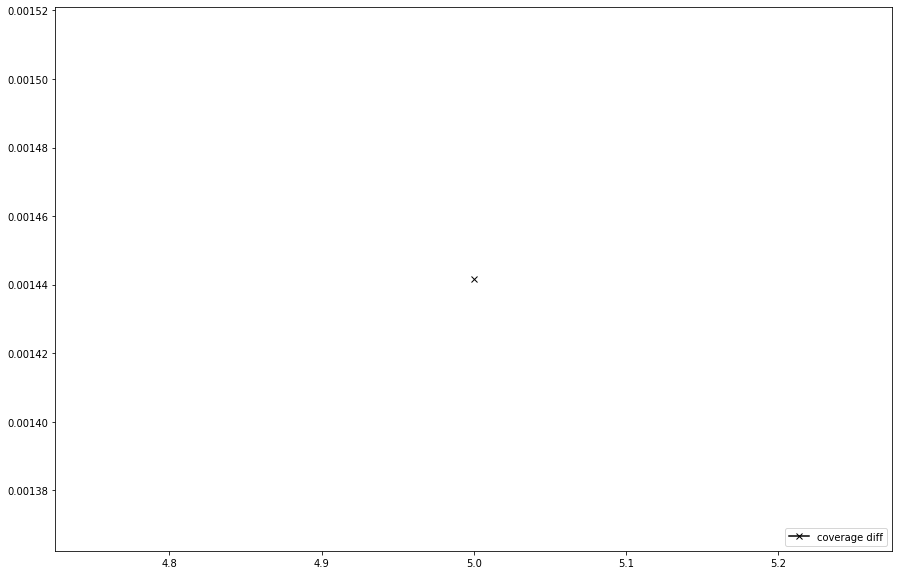

In [11]:
x = strats[(strats["greedy type"] == 'count goal') & (strats["greedy weighted"] == True)]["location goal"]
y1 = dif
plt.figure(figsize=(15, 10))
plt.plot(x, y1, marker='x', color='k', label="coverage diff")
plt.legend(loc="lower right")
plt.show()